# Correlation
- ● Correlation is any statistical relationship or association between 2 random variables(Features)
- ● Correlations are useful because they can indicate a predictive relationship
- ● Correlation does not imply causation, If they correlated, doesnt mean there's a reason why feature 2 is related to feature 1
- Correlation commonly refers to the degree to which a pair of variables are **linearly** related.
- EX:
   - 1 Pearson’s correlation coefficient (linear relationship)
   - 2 Spearman’s rank correlation coefficient (Non-linear relationship)
   - 3 Kendall rank correlation coefficient (Non-linear relationship)
- • Correlation is a measure of the linear relationship of 2 or more variables
- • Through correlation, we can predict one variable from the other
   - • Good variables are highly correlated with the target
- • Correlated predictor variables provide redundant information
   - • Variables should be correlated with the target but uncorrelated among themselves

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: 
- "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

will demonstrate how to select features based on correlation using 2 procedures:

- The first one is a brute force function that finds correlated features without any further insight. 
- The second procedure finds groups of correlated features, which we can then explore to decide which one we keep and which ones we discard.

Often, more than 2 features are correlated with each other. We can find groups of 3, 4 or more features that are correlated. By identifying these groups, with procedure 2, we can then select from each group, which feature we want to keep, and which ones we want to remove.
- The most used method to determine correlation is the Pearson's correlation method.

- • Correlated features do not necessarily affect model accuracy per se.
- • High dimensionality does (lots of features) : **Curse of dimensionality**
- • If 2 features are highly correlated, the second one will add little information over the previous one: removing it helps reduce dimension
- • Correlation affects model interpretability: linear models
- • Different classifiers show different sensitivity to correlation, linear models are more sensetive

# Pearson’s coefficient 
its values vary between -1 and 1:
- 1 is highly correlated: the more of variable x1, the more of x2
- -1 is highly anti-correlated: the more of variable x1, the less of x2

Removing Correlated Features:
- 2 Methods:
- Method 1 (brute force approach):
  - ● Scan features as they appear in the dataframe
  - ● If a second feature is correlated with the feature we are evaluating, we remove it. (compares the first feature with the rest)
       -  Fast
       -  BUT We may remove an important feature (than the one that appeared first)
        
- Method 2
   - 1. Identify groups of correlated features
   - 2. Select the most predictive feature from each group based on certain criteria. ex:
        - 1. Build a small machine learning model using the features in the group (criteria)
        - 2. Other criteria, eg. Number of missing values (keep the feature with the less missing values)
   - 3. Discard the rest of the features in this group. At the end we have 1 feature from each group

# 4.1-Correlation-Pearson
# 4.2-Basic-methods-plus-correlation-pipeline
# 4.3-Correlation-with-Feature-engine
# 4.4-Pipeline-with-Feature-engine

In [3]:
# 4.1-Correlation-Pearson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../dataset_2.csv', nrows=50000)
print(data.shape)
data.head(2)

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433


In practice, feature selection should be done after data pre-processing, so ideally, all the categorical variables are encoded into numbers, and then you can asses whether they are correlated with other features.

This dataset, for simplicity, contains only numerical variables.

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

<AxesSubplot:>

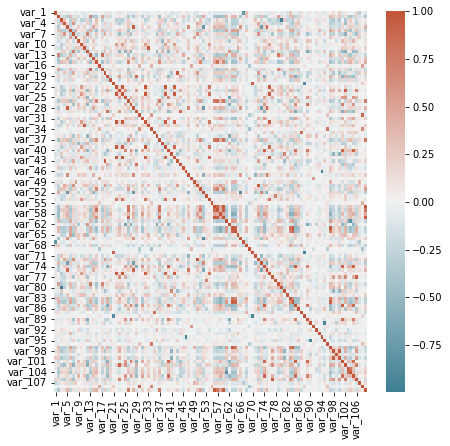

In [7]:
# Correlation heatmap, visualise correlated features:
# will build a correlation matrix, which examines the correlation of all features (that is, for all possible feature combinations)
# and then visualise the correlation matrix using a heatmap
# the default correlation method of pandas.corr is pearson, I include it anyways for the demo
corrmat = X_train.corr(method='pearson')

# we can make a heatmap with the package seaborn and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
sns.heatmap(corrmat, cmap=cmap)

In the plot above, the dark orange squares correspond to highly correlated features (>0.8). Darker blue squares corresponds to negatively correlated features (<-0.8).

The diagonal represents the correlation of a feature with itself, therefore the value is 1.

We can see that there are a few features that are highly correlated.

In [8]:
# Correlation scatterplots
# Looking at the heatmap, we see that var25 is highly correlated with others in the dataset
# with this code we can get the other variable names and also print the correlation coefficient between var25 and these variables:

c = 0
# iterate over each correlation value for var_5:
for i in corrmat.loc['var_5']:
    # if highly correlated
    if i>0.8:
        # print the variable name and the correlation coefficient
        print(corrmat.columns[c], i)
    c = c +1

var_5 1.0
var_28 0.9536721652384935
var_75 0.8616179292025201


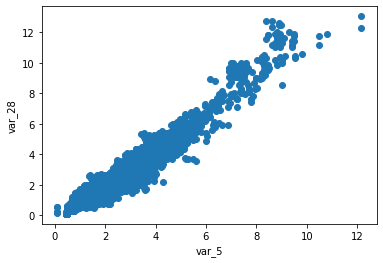

In [9]:
# now, let's plot the variables
plt.scatter(X_train['var_5'], X_train['var_28'])
plt.ylabel('var_28')
plt.xlabel('var_5')
plt.show()

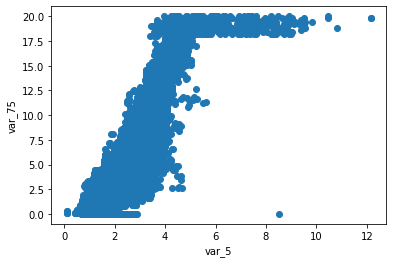

In [11]:
plt.scatter(X_train['var_5'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_5')
plt.show()
#We see that the correlation of the second pair of variables is not quite linear.
#Next, let's identify a couple of negatively correlated variables:

In [12]:
c = 0
for i in corrmat.loc['var_88']:
    # if highly and negatively correlated
    if i<-0.8:
        # print the variable name and the correlation coefficient
        print(corrmat.columns[c], i)
    c = c +1

var_21 -0.8943929785046758
var_70 -0.9489465365954278


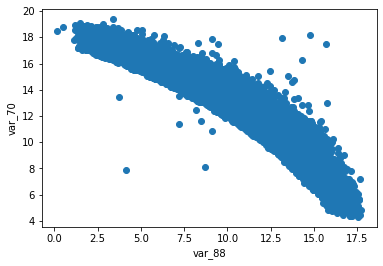

In [13]:
plt.scatter(X_train['var_88'], X_train['var_70'])
plt.ylabel('var_70')
plt.xlabel('var_88')
plt.show()

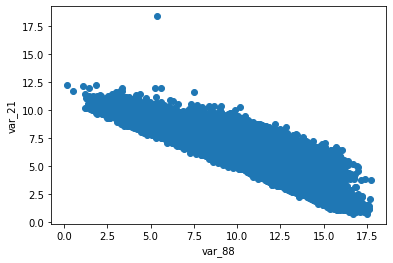

In [14]:
plt.scatter(X_train['var_88'], X_train['var_21'])
plt.ylabel('var_21')
plt.xlabel('var_88')
plt.show()

The higher the value of 1 variable, the lower the value of the other variable.

let's proceed with feature selection

## Remove correlated

### Method 1 : Brute force approach

In [15]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else without any further insight.

def correlation(dataset, threshold):
    # create a set where I will store the names of correlated columns
    col_corr = set()
    # create the correlation matrix
    corr_matrix = dataset.corr()    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        # check with other features
        for j in range(i):
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j  in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                # and add it to our correlated set
                col_corr.add(colname)                
    return col_corr

In [16]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0.8632980418993791 var_17 var_13
0.9813409653986921 var_24 var_22
0.9536721652384935 var_28 var_5
0.8341792843814466 var_29 var_19
0.990430734999363 var_32 var_22
0.9804113632495293 var_32 var_24
0.9443605986205844 var_33 var_11
0.9744609333741678 var_39 var_22
0.9431153866790611 var_39 var_24
0.9748779191363224 var_39 var_32
0.91910579117498 var_42 var_22
0.9672922649953389 var_42 var_24
0.9199183443060952 var_42 var_32
0.8567453370818933 var_42 var_39
0.9654741987814475 var_43 var_18
0.8358214281472581 var_44 var_29
0.8150241475398633 var_54 var_24
0.8287090109274785 var_54 var_42
0.837404481636077 var_57 var_15
0.8318090759398273 var_57 var_26
0.8207993837973238 var_57 var_37
0.8440857367712562 var_57 var_56
0.8131947525226287 var_59 var_26
0.8306144274586774 var_59 var_37
0.9757443944210573 var_59 var_56
0.9223172758595293 var_59 var_57
0.9244600573582408 var_64 var_63
0.8925221926487203 var_66 var_52
0.895397163737887 var_70 var_21
0.9702627369945973 var_72 var_50
0.88311916559035

40

In [17]:
#We can see that 40 features are highly correlated with other features in the training set. 
#Very likely, by removing these correlated features, the performance of your machine learning models will drop very little, if at all. 
corr_features

{'var_101',
 'var_103',
 'var_11',
 'var_13',
 'var_15',
 'var_18',
 'var_19',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_26',
 'var_28',
 'var_29',
 'var_3',
 'var_30',
 'var_32',
 'var_35',
 'var_37',
 'var_39',
 'var_40',
 'var_42',
 'var_46',
 'var_5',
 'var_50',
 'var_52',
 'var_56',
 'var_57',
 'var_59',
 'var_60',
 'var_63',
 'var_64',
 'var_70',
 'var_74',
 'var_77',
 'var_84',
 'var_85',
 'var_89',
 'var_90',
 'var_98'}

In [18]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 68), (15000, 68))

By removing correlated columns we reduced the feature space from 108 numerical columns to 68.

### Method 2 : Second approach

The second approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove.

In [19]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)

In [20]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,var_80,var_3,0.994923
1,var_3,var_80,0.994923
2,var_32,var_22,0.990431
3,var_22,var_32,0.990431
4,var_56,var_109,0.987777


In [21]:
# find groups of correlated features
grouped_feature_ls = []
correlated_groups = []
for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]
        # append the block of features to the list
        correlated_groups.append(correlated_block)
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 27 correlated groups
out of 108 total features


In [22]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

  feature1 feature2      corr
0   var_80    var_3  0.994923

   feature1 feature2      corr
2    var_32   var_22  0.990431
8    var_32   var_24  0.980411
13   var_32   var_39  0.974878
47   var_32   var_76  0.931718
56   var_32   var_42  0.919918

    feature1 feature2      corr
4     var_56  var_109  0.987777
11    var_56   var_59  0.975744
103   var_56   var_57  0.844086

   feature1 feature2      corr
16   var_72   var_50  0.970263

   feature1 feature2      corr
18   var_94   var_46  0.967895

   feature1 feature2      corr
22   var_43   var_18  0.965474

   feature1 feature2      corr
26   var_63   var_84  0.959138
40   var_63   var_97  0.940184
53   var_63   var_64  0.924460

   feature1 feature2      corr
30   var_28    var_5  0.953672
67   var_28   var_75  0.904413

   feature1 feature2      corr
32   var_88   var_70  0.948947
75   var_88   var_21  0.894393

   feature1 feature2      corr
36   var_11   var_33  0.944361

   feature1 feature2      corr
42   var_98  var_100  0.938

In [23]:
# we can now investigate further features within one group.
# let's for example select group 1
group = correlated_groups[1]
group

,feature1,feature2,corr
2,var_32,var_22,0.990431
8,var_32,var_24,0.980411
13,var_32,var_39,0.974878
47,var_32,var_76,0.931718
56,var_32,var_42,0.919918


**In this group, several features are highly correlated. Which one should we keep and which ones should we remove?**

One criteria to select which features to use from this group, would be to use those with **less missing data**. 

Our dataset contains no missing values, so this is not an option. But keep this in mind when you work with your own datasets.

Alternatively, we could build a **machine learning algorithm using all the features from the above list, and select the more predictive one**.

In [24]:
from sklearn.ensemble import RandomForestClassifier
# add all features of the group to a list
features = list(group['feature2'].unique())+['var_32']

# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [25]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)
importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,var_39,0.194210
3,var_76,0.187360
0,var_22,0.167467
1,var_24,0.167054
4,var_42,0.147102
5,var_32,0.136807


In this case, feature var_39 shows the highest importance according to random forests. Then, I would select var_39, and remove all the remaining features from this group from the dataset.

**Note**

None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile checking that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

That is all for this lecture, I hope you enjoyed it and see you in the next one!

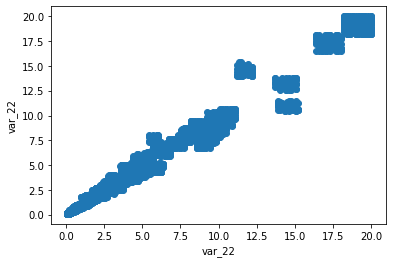

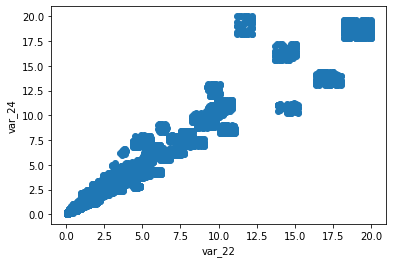

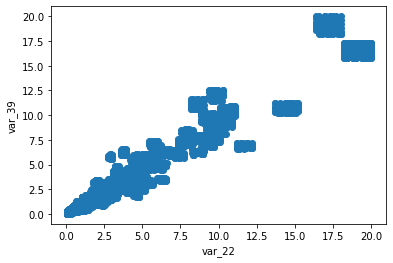

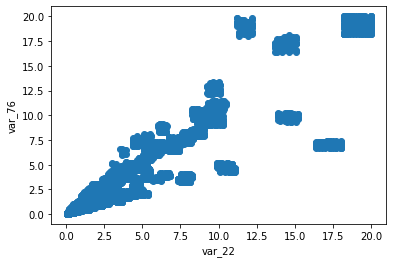

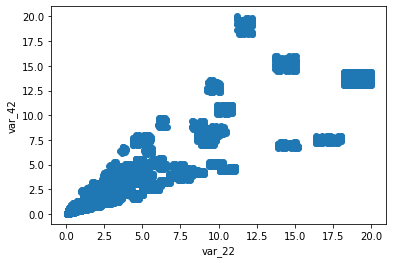

In [26]:
# let's plot the correlation of the features in the correlated group from the previous cell
for feature in group['feature2']:
    plt.scatter(X_train['var_32'], X_train[feature])
    plt.xlabel('var_22')
    plt.ylabel(feature)
    plt.show()

****************************************
*****************************************
***********************************

In [27]:
#4.2-Basic-methods-plus-correlation-pipeline
# select features using a combination of constant, quasi-constant, and correlation methods. 
# will compare the performance of machine learning models built with the different feature subsets.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [28]:
data = pd.read_csv('../dataset_1.csv')
print(data.shape)
data.head(1)

(50000, 301)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [30]:
# keep a copy of the dataset with all the variables
# to measure the performance of machine learning models at the end of the notebook
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [31]:
# remove constant features
constant_features = [ feat for feat in X_train.columns if X_train[feat].std() == 0 ]
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [32]:
# remove quasi-constant features , This code remove constant and quasi-constant altogether.
sel = VarianceThreshold( threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel.fit(X_train)  # fit finds the features with low variance
sum(sel.get_support()) # how many not quasi-constant?

215

In [33]:
features_to_keep = X_train.columns[sel.get_support()]

In [34]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [35]:
# sklearn transformations lead to numpy arrays, transform the arrays back to dataframes
# getting the columns assigned correctly
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [36]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210


10

In [37]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [38]:
# keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models at the end of the notebook
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [39]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  93


In [40]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [41]:
### Compare performance in machine learning models
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [42]:
# original dataset (all variables)
run_randomForests(X_train_original, X_test_original, y_train, y_test)

Train set
Random Forests roc-auc: 0.807612232524249
Test set
Random Forests roc-auc: 0.7868832427636059


In [43]:
# filter methods - basic
run_randomForests(X_train_basic_filter, X_test_basic_filter, y_train, y_test)

Train set
Random Forests roc-auc: 0.810290026780428
Test set
Random Forests roc-auc: 0.7914020645941601


In [44]:
# filter methods - correlation
run_randomForests(X_train,X_test,y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


We can see that removing constant, quasi-constant, duplicated and correlated features reduced the feature space dramatically (from 300 to 112), without affecting the performance of the random forests (0.786 vs 0.7859).

In [45]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [46]:
# original
# for logistic regression features need to be in the same scale
scaler = StandardScaler().fit(X_train_original)
run_logistic(scaler.transform(X_train_original), scaler.transform(X_test_original), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8028301567886174
Test set
Logistic Regression roc-auc: 0.7951109867720157


In [47]:
# filter methods - basic
scaler = StandardScaler().fit(X_train_basic_filter)

run_logistic(scaler.transform(X_train_basic_filter),scaler.transform(X_test_basic_filter), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.802270249932219
Test set
Logistic Regression roc-auc: 0.7947366130595612


In [49]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train)

run_logistic(scaler.transform(X_train), scaler.transform(X_test), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7942670292952432
Test set
Logistic Regression roc-auc: 0.7881803821166471


Similarly, for logistic regression, removing constant, quasi-constant, duplicated and highly correlated features, did not affect dramatically the performance of the algorithm.
